<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ML/blob/main/ONE_IA_Atrasos_Voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explorando os dados

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
url = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/flights.csv'
dados = pd.read_csv(url)
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [6]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [7]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


Os dados estão aparentemente limpos, sem valores nulos e com tipos coerentes, os valores parecem condizentes, a principio sem Outliers consideráveis

## Visualizações Gráficas dos dados

In [18]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
average_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


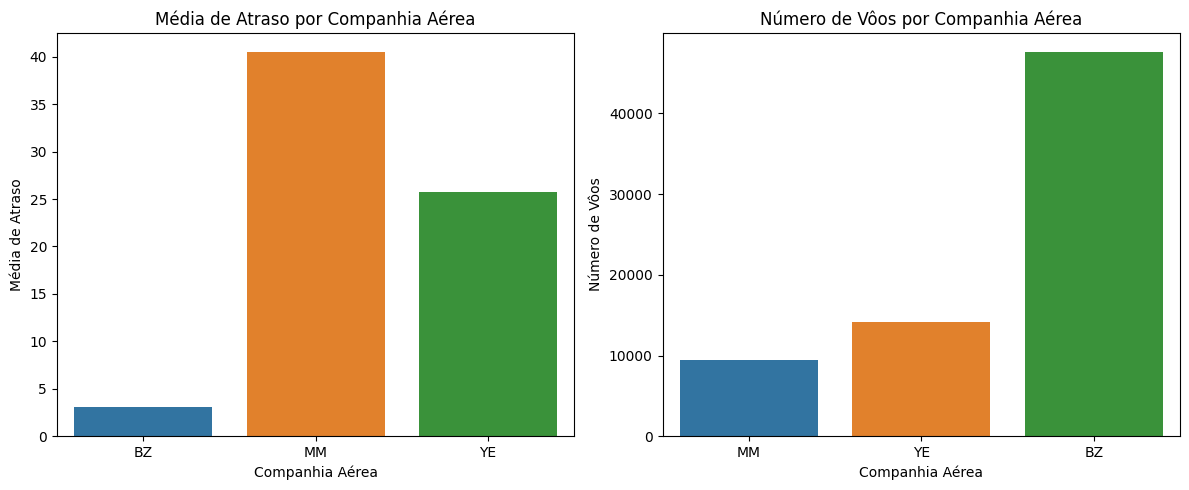

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='airline', y='delay', data=average_delay, hue='airline', ax=axs[0])
axs[0].set_title('Média de Atraso por Companhia Aérea')
axs[0].set_xlabel('Companhia Aérea')
axs[0].set_ylabel('Média de Atraso')

sns.countplot(x='airline', data=dados, hue='airline', ax=axs[1])
axs[1].set_title('Número de Vôos por Companhia Aérea')
axs[1].set_xlabel('Companhia Aérea')
axs[1].set_ylabel('Número de Vôos')

plt.tight_layout()
plt.show()

In [29]:
def voos_atrasos(dados, col_filtro, col_obj):
  average_delay = dados.groupby(col_filtro)[col_obj].mean().reset_index()
  average_delay
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  sns.barplot(x=col_filtro, y=col_obj, data=average_delay, hue=col_filtro, ax=axs[0])
  axs[0].set_title(f'Média de Atraso por {col_filtro}')
  axs[0].set_xlabel(col_filtro)
  axs[0].set_ylabel('Média de Atraso')

  sns.countplot(x=col_filtro, data=dados, hue='airline', ax=axs[1])
  axs[1].set_title(f'Número de Vôos por {col_filtro}')
  axs[1].set_xlabel(col_filtro)
  axs[1].set_ylabel('Número de Vôos')

  plt.tight_layout()
  return plt

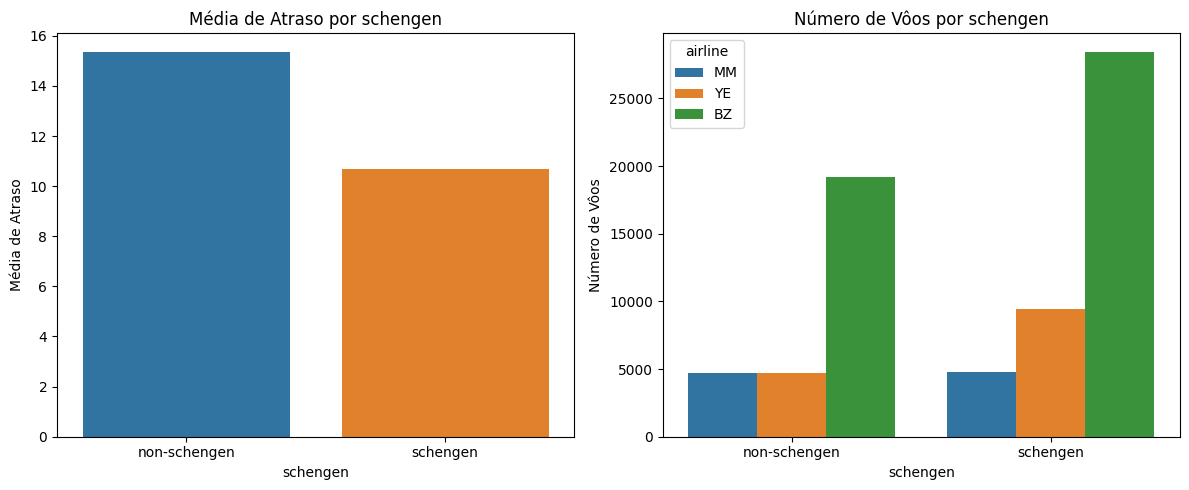

In [39]:
voos_atrasos(dados, 'schengen', 'delay').show()

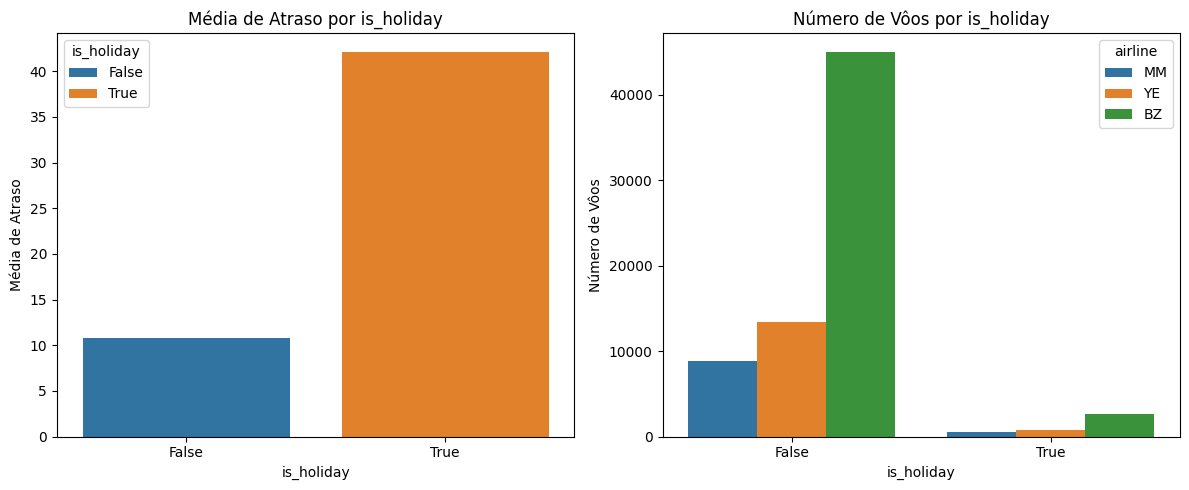

In [25]:
voos_atrasos(dados, 'is_holiday', 'delay').show()

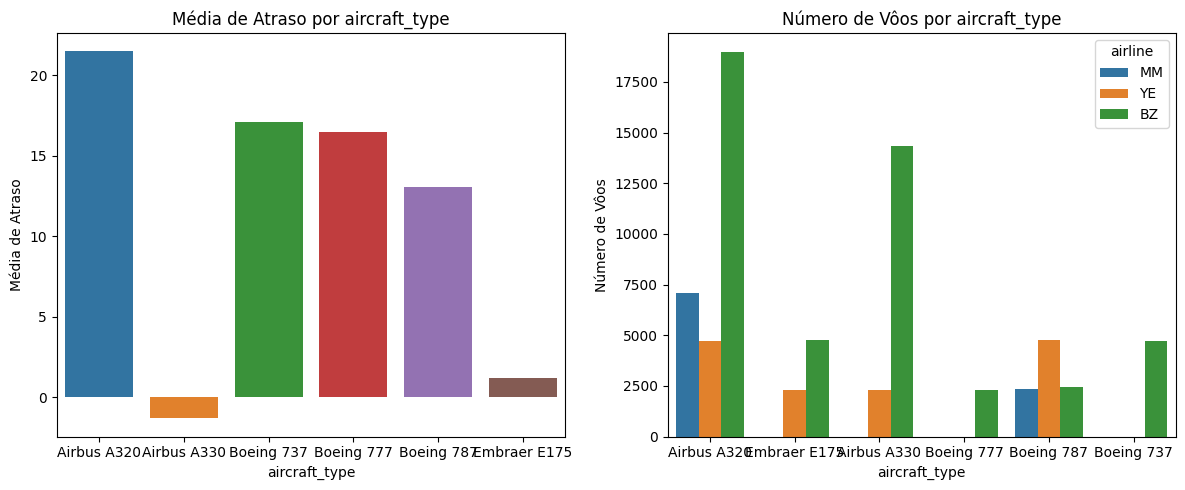

In [30]:
voos_atrasos(dados, 'aircraft_type', 'delay').show()

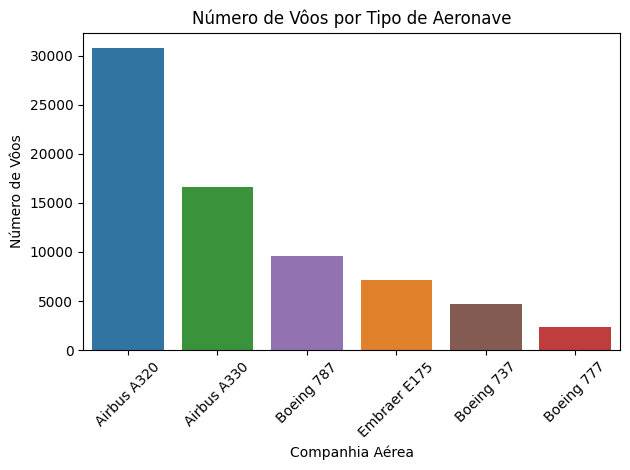

In [38]:
order = dados['aircraft_type'].value_counts().index

sns.countplot(x='aircraft_type', data=dados, hue='aircraft_type', order=order)
plt.title('Número de Vôos por Tipo de Aeronave')
plt.xlabel('Companhia Aérea')
plt.xticks(rotation=45)
plt.ylabel('Número de Vôos')

plt.tight_layout()
plt.show()

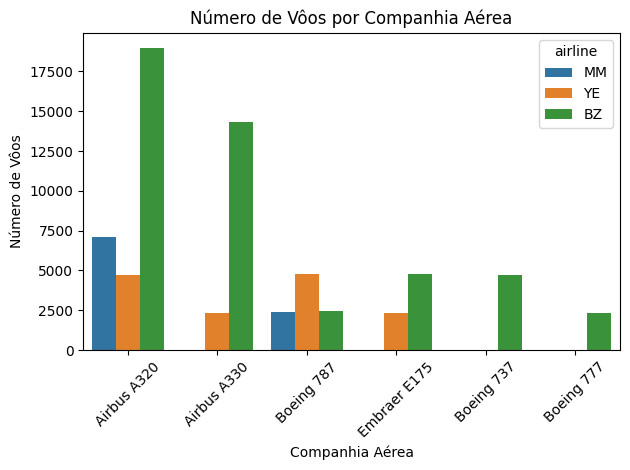

In [34]:
order = dados['aircraft_type'].value_counts().index

sns.countplot(x='aircraft_type', data=dados, hue='airline', order=order)
plt.title('Número de Vôos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.xticks(rotation=45)
plt.ylabel('Número de Vôos')

plt.tight_layout()
plt.show()

## Analisando a distribuição dos dados

Text(0.5, 0, 'Hora de Chegada')

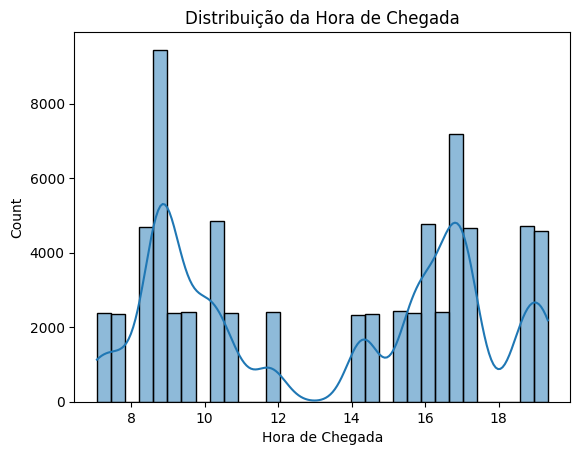

In [42]:
sns.histplot(data=dados, x='arrival_time', kde=True)
plt.title('Distribuição da Hora de Chegada')
plt.xlabel('Hora de Chegada')

Text(0.5, 0, 'Hora de Chegada')

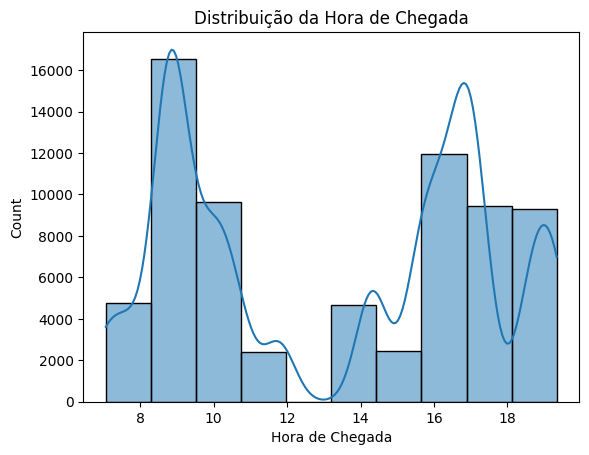

In [43]:
sns.histplot(data=dados, x='arrival_time', kde=True, bins=10)
plt.title('Distribuição da Hora de Chegada')
plt.xlabel('Hora de Chegada')

Text(0.5, 0, 'Hora de Chegada')

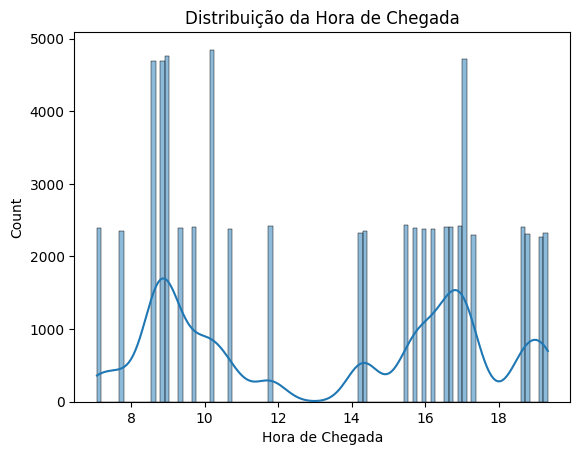

In [44]:
sns.histplot(data=dados, x='arrival_time', kde=True, bins=100)
plt.title('Distribuição da Hora de Chegada')
plt.xlabel('Hora de Chegada')



### **Freedman–Diaconis rule**

A regra de Freedman-Diaconis é um método para determinar a largura ideal dos bins (intervalos) em um histograma, buscando minimizar a diferença entre a distribuição empírica e a teórica. Ela utiliza o intervalo interquartil (IQR) para capturar a variabilidade dos dados e é robusta a outliers.
Como funciona:
A fórmula para calcular a largura do bin (Δ) pela regra de Freedman-Diaconis é:
Code

Δ = 2 * (Q75 - Q25) / N^(1/3)

Onde:

    Q75: é o 75º percentil (terceiro quartil) dos dados.
    Q25: é o 25º percentil (primeiro quartil) dos dados.
    N: é o número total de observações.

Por que usar?

    Robustez a outliers:
    O uso do IQR torna a regra menos sensível a valores extremos em comparação com outras regras que usam o desvio padrão, como a regra de Scott, segundo sites de pesquisa.
    Adequada para distribuições não normais:
    A regra de Freedman-Diaconis é uma boa opção quando se lida com dados que não seguem uma distribuição normal, informa a documentação da Astropy.

Facilidade de cálculo:
A fórmula é relativamente simples de calcular, mesmo com grandes conjuntos de dados.

Em resumo:
A regra de Freedman-Diaconis é uma ferramenta útil para a construção de histogramas, especialmente quando a robustez a outliers e a adequação a distribuições não normais são importantes

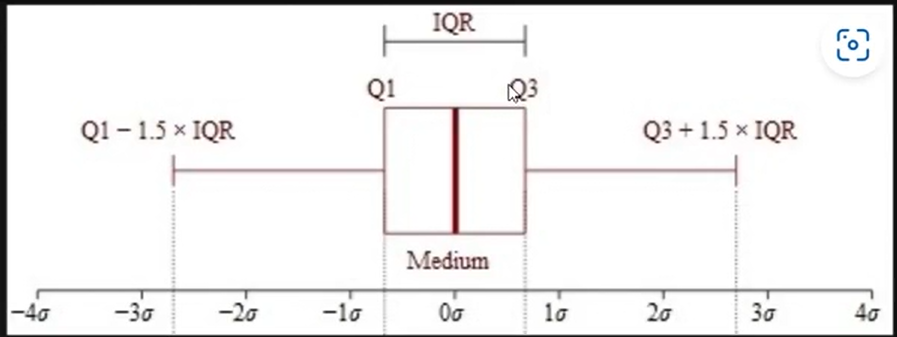

In [46]:
def calcular_fdr(df, col):
  Q75, Q25 = np.percentile(df[col], [75,25])
  IQR = Q75-Q25
  largura_bin = 2 * IQR * np.power(len(df[col]), -1/3)
  return largura_bin

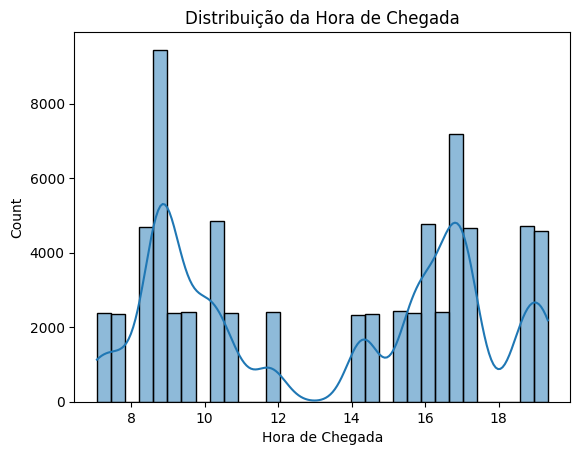

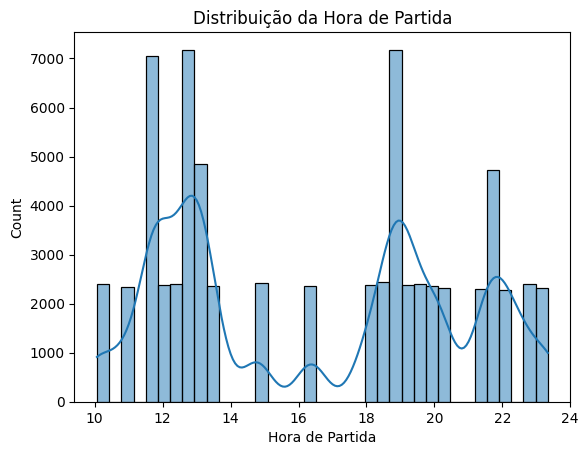

In [50]:
largura_bin = calcular_fdr(dados, 'arrival_time')
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin)
plt.title('Distribuição da Hora de Chegada')
plt.xlabel('Hora de Chegada')
plt.show()
largura_bin = calcular_fdr(dados, 'departure_time')
sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin)
plt.title('Distribuição da Hora de Partida')
plt.xlabel('Hora de Partida')
plt.show()

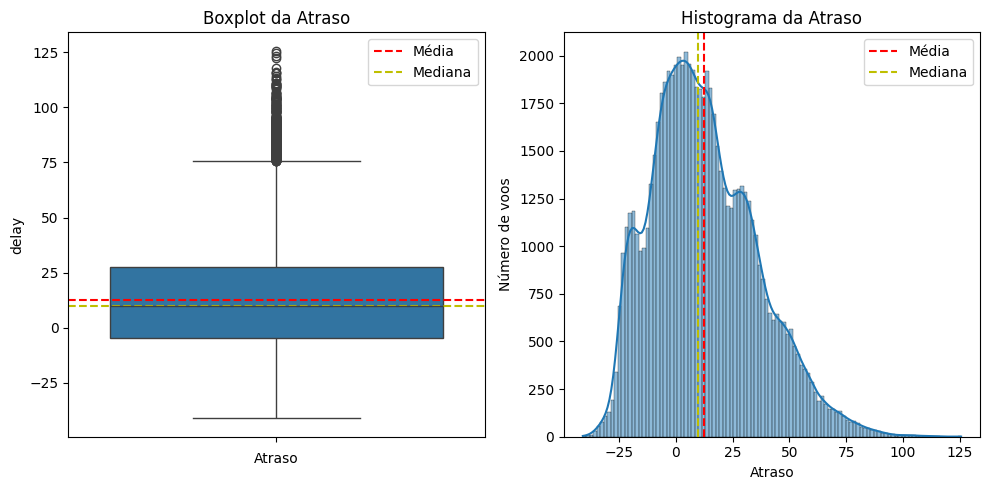

In [54]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()
std_delay = dados['delay'].std()
largura_bin = calcular_fdr(dados, 'delay')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot da Atraso')
axes[0].set_xlabel('Atraso')
axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].axhline(y=median_delay, color='y', linestyle='--', label='Mediana')
axes[0].legend()

sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin)
axes[1].set_title('Histograma da Atraso')
axes[1].set_xlabel('Atraso')
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()
plt.tight_layout()
plt.show()

Os dados estão consistentes e com uma boa distribuição, com leve assimetria à direita

## Feature engineering

In [55]:
dados.head(1)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981


In [56]:
dados['year'].astype(str)

,year
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
71170,2022
71171,2022
71172,2022
71173,2022


In [57]:
dados['day'].astype(str)

,day
0,0
1,0
2,0
3,0
4,0
...,...
71170,364
71171,364
71172,364
71173,364


In [58]:
(dados['day']+1).astype(str)

,day
0,1
1,1
2,1
3,1
4,1
...,...
71170,365
71171,365
71172,365
71173,365


In [59]:
dados['year'].astype(str) + '-'+ (dados['day']+1).astype(str)

,0
0,2010-1
1,2010-1
2,2010-1
3,2010-1
4,2010-1
...,...
71170,2022-365
71171,2022-365
71172,2022-365
71173,2022-365


In [60]:
pd.to_datetime(dados['year'].astype(str) + '-'+ (dados['day']+1).astype(str), format='%Y-%j')


,0
0,2010-01-01
1,2010-01-01
2,2010-01-01
3,2010-01-01
4,2010-01-01
...,...
71170,2022-12-31
71171,2022-12-31
71172,2022-12-31
71173,2022-12-31


In [61]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-'+ (dados['day']+1).astype(str), format='%Y-%j')

In [62]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [64]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])

In [65]:
dados['day_name'] = dados['date'].dt.day_name()

In [ ]:
dados['day_name'] = dados['date'].dt.day_name()

In [89]:
time = 8.885071
m
h = int(time)
m = int((time - h) * 60)
s = int((time - h) * 3600)/100
print(f"{h}:{m}:{s}")

8:53:31.86


In [85]:
dados['dt_arrival'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day']+1).astype(str) + ' ' +
                      dados['arrival_time'].astype(int).astype(str) + ':' + ((dados['arrival_time']-dados['arrival_time'].astype(int))*60).astype(int).astype(str)
                      + ':' + ((dados['arrival_time']-dados['arrival_time'].astype(int))*36).astype(int).astype(str)
                       , format='%Y-%j %H:%M:%S')

In [96]:
dados['dt_arrival'].dt.day_name()

,dt_arrival
0,Friday
1,Friday
2,Friday
3,Friday
4,Friday
...,...
71170,Saturday
71171,Saturday
71172,Saturday
71173,Saturday


In [98]:
def get_arrival_period(hour):
  if 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 14:
    return 'Lunchtime'
  elif 14 <= hour < 18:
    return 'Afternoon'
  elif 18 <= hour < 23:
    return 'Evening'
  else:
    return 'Night'

dados['arrival_period'] = dados['dt_arrival'].dt.hour.apply(get_arrival_period)
display(dados.head())

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name,dt_arrival,arrival_period
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday,2010-01-01 08:53:31,Morning
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday,2010-01-01 08:56:33,Morning
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday,2010-01-01 18:38:22,Evening
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday,2010-01-01 15:58:34,Afternoon
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday,2010-01-01 16:34:20,Afternoon


In [86]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name,dt_arrival
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday,2010-01-01 08:53:31
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday,2010-01-01 08:56:33
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday,2010-01-01 18:38:22
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday,2010-01-01 15:58:34
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday,2010-01-01 16:34:20
